In [15]:
library(rpart)
library(caret)
set.seed(3277)

In [16]:
carmpg <- read.csv("car-mpg.csv")
indices <- createDataPartition(carmpg$mpg, p=0.75, list=FALSE)
training <- carmpg[indices,]
testing <- carmpg[-indices,]
nrow(training)
nrow(testing)

[1] 33

[1] 9

In [17]:
fit <- rpart(mpg ~ cylinders + displacement + horsepower + weight + acceleration + modelyear + maker,
             method="anova", data=training)
fit

n= 33 

node), split, n, deviance, yval
      * denotes terminal node

1) root 33 26.727270 1.909091  
  2) weight>=3121.5 10  0.000000 1.000000 *
  3) weight< 3121.5 23 14.869570 2.304348  
    6) modelyear>=78.5 9  4.888889 1.888889 *
    7) modelyear< 78.5 14  7.428571 2.571429 *

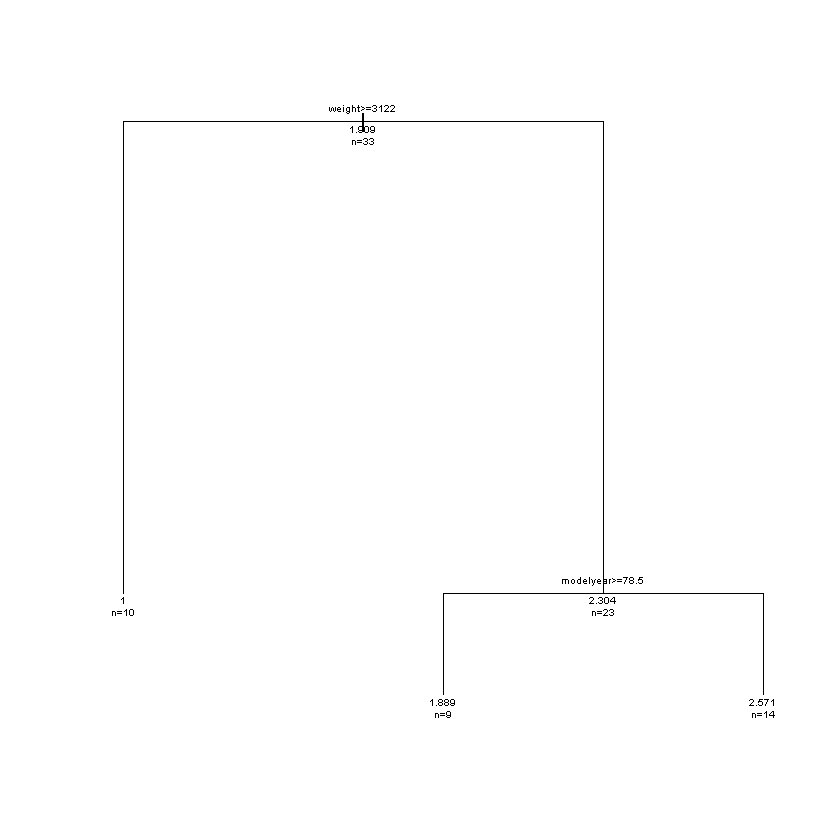

In [18]:
plot(fit)
text(fit, use.n=TRUE, all=TRUE, cex=.5)

In [19]:
predicted <- predict(fit, newdata=testing)
predicted
testing

1        3        7        8       24       28       32       39 
1.000000 1.000000 1.000000 1.000000 1.888889 2.571429 2.571429 1.888889 
      40 
1.888889

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,maker
1,Bad,8,350,150,4699,14.5,74,America
3,Bad,8,400,175,4385,12.0,72,America
7,Bad,6,250,105,3897,18.5,75,America
8,Bad,6,163,133,3410,15.8,78,Asia
24,OK,6,146,120,2930,13.8,81,Europe
28,OK,4,97,60,1834,19.0,71,Asia
32,OK,4,98,83,2219,16.5,74,Asia
39,Good,4,135,84,2370,13.0,82,America
40,Good,4,105,63,2125,14.7,82,America
